## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Let's load the dataset

In [2]:
df=pd.read_csv("Suicides_in_India.csv")

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.9+ MB


In [5]:
#For counting the size of data we use np.product(rows,columns) since df.shape gives a tuple which contain rows and columns so:
rows,cols=df.shape
print("the size of data in this data set is : ", np.product((rows,cols)))

the size of data in this data set is :  1425114


In [6]:
#Let's find out any null values and clean the data set  
df.isnull().sum()
print("The number of empty cells in our data  set are  : ",df.isnull().sum().sum())
#since our data set is all cleaned so there is not need to clean it

The number of empty cells in our data  set are  :  0


In [7]:
Years=df.Year.unique()
#for finding unique values in Year column we use unique functiom

In [8]:
casesInEachYear=[]
for i in Years:
    rowsCols=df[df["Year"]==i].shape
    casesInEachYear.append(rowsCols[0])

In [9]:
casesInEachYear
#here we got cases in each years

[19797,
 19790,
 19786,
 19783,
 19803,
 19786,
 19794,
 19797,
 19786,
 19792,
 19806,
 19799]

### NOW LET US PLOT THIS ON A BAR CHART 

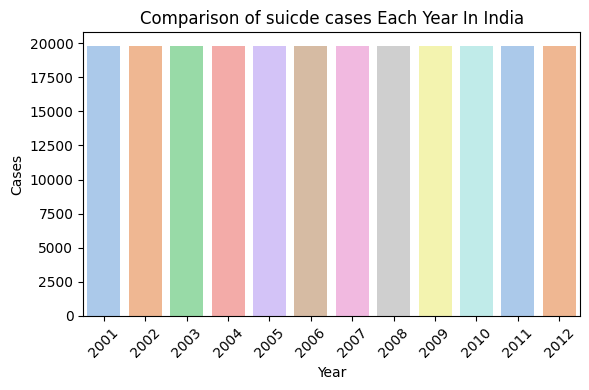

In [10]:
plt.figure(figsize=(6, 4))
color_palette = sns.color_palette("pastel")
sns.barplot(x=Years, y=casesInEachYear, color='blue', palette=color_palette)
plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Comparison of suicde cases Each Year In India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
Gender = df.Gender.unique()
Gender

array(['Male', 'Female'], dtype=object)

In [12]:
suicidebyGender=[]
for i in Gender:
    cases=df[df.Gender==i].shape
    suicidebyGender.append((cases[0]/len(df)*100))

In [13]:
suicidebyGender

[50.050311764532516, 49.94968823546748]

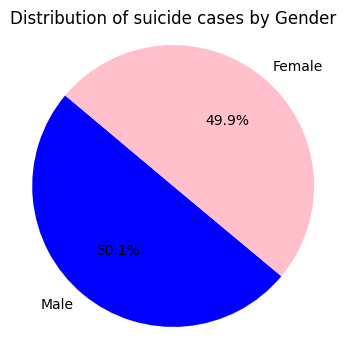

In [14]:
labels = ['Male', 'Female']
plt.figure(figsize=(4, 4))
plt.pie(suicidebyGender, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Distribution of suicide cases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
#Cases of suicide among males and female are also same

In [15]:
typecodes=df.Type_code.unique()
suicideTypecodes=[]
for i in typecodes:
    cases=df[df.Type_code==i].shape
    suicideTypecodes.append(cases[0])
print(typecodes,suicideTypecodes)

['Causes' 'Means_adopted' 'Professional_Profile' 'Education_Status'
 'Social_Status'] [109200, 67200, 49263, 7296, 4560]


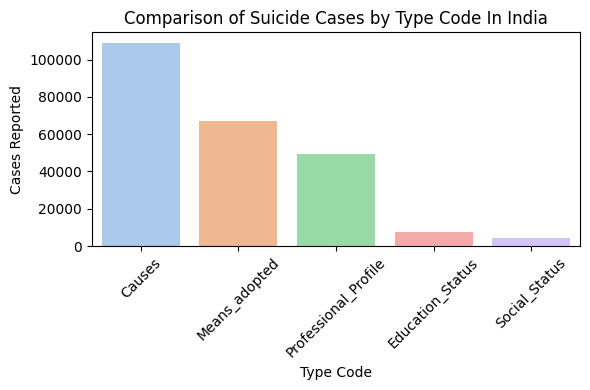

In [16]:
# Define a color palette
color_palette = sns.color_palette("pastel")

plt.figure(figsize=(6, 4))
sns.barplot(x=typecodes, y=suicideTypecodes, palette=color_palette)
plt.xlabel('Type Code')
plt.ylabel('Cases Reported')
plt.title('Comparison of Suicide Cases by Type Code In India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

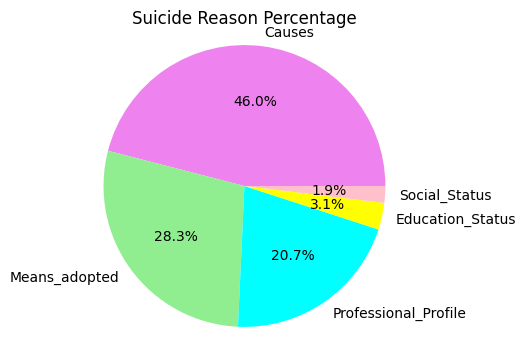

In [17]:
plt.figure(figsize=(4, 4))
plt.pie(suicideTypecodes, labels=typecodes, autopct='%1.1f%%',  colors=['violet', 'lightgreen','cyan','yellow',"pink"])
plt.title('Suicide Reason Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
Type=df.Type.unique()
len(Type)

69

In [19]:
suicideByType=[]
for i in Type:
    cases=df[df.Type ==i].shape
    suicideByType.append(cases[0])
    
suicideByType
len(suicideByType)

69

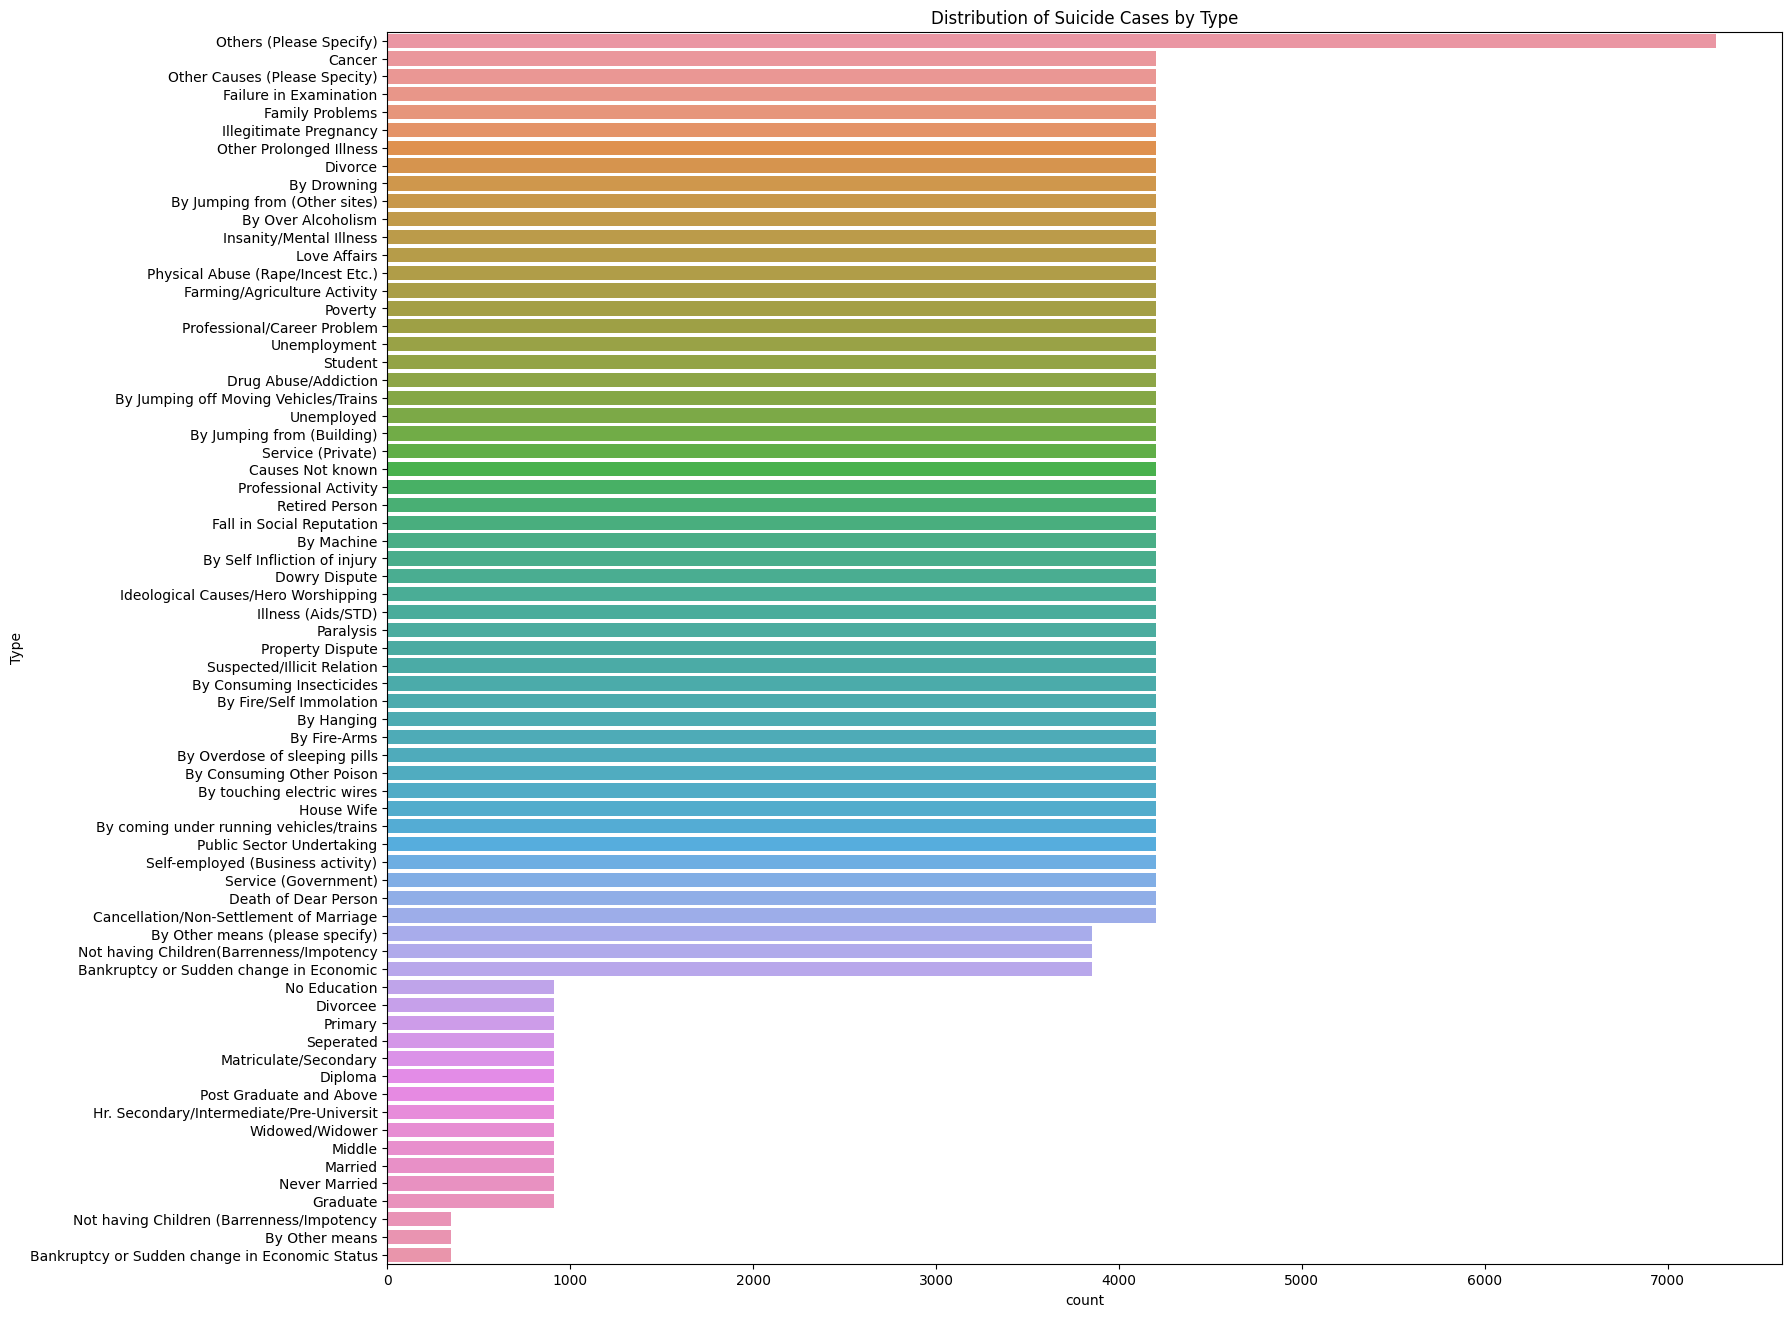

In [20]:
plt.figure(figsize=(18, 16))
sns.countplot(y='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Distribution of Suicide Cases by Type')
plt.show()

Year
2001    19797
2002    19790
2003    19786
2004    19783
2005    19803
2006    19786
2007    19794
2008    19797
2009    19786
2010    19792
2011    19806
2012    19799
Name: Type, dtype: int64


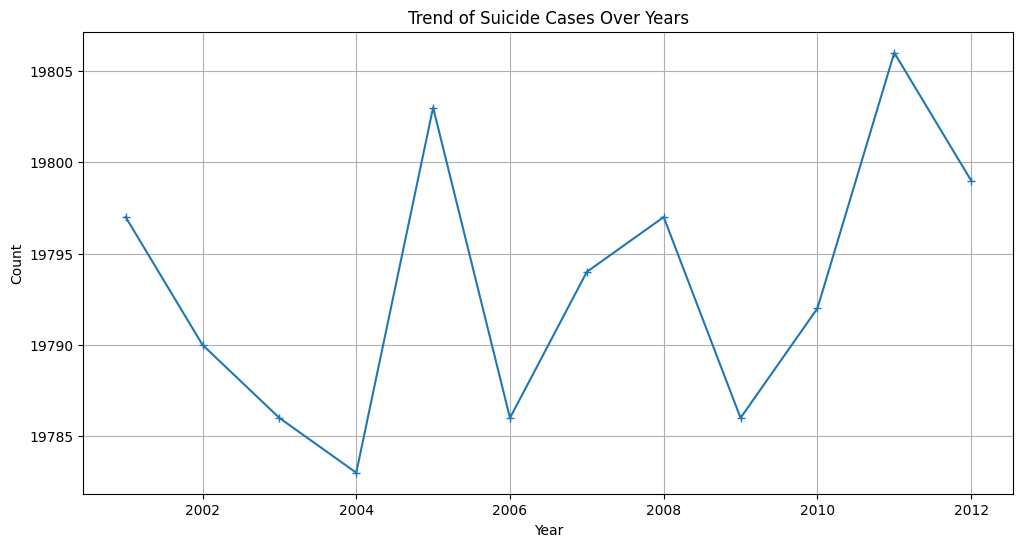

In [21]:
plt.figure(figsize=(12, 6))
time_series = df.groupby('Year')['Type'].count()
print(time_series)
time_series.plot(marker='+')
plt.title("Trend of Suicide Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [22]:
uniqueAgeGroup=df.Age_group.unique()
uniqueAgeGroup

array(['15-29', '60+', '0-14', '45-59', '30-44', '0-100+'], dtype=object)

In [23]:
suicidebyage=[]
for i in uniqueAgeGroup:
    cases=df[df.Age_group==i].shape
    suicidebyage.append(cases[0])
    
    
suicidebyage
    

[45223, 45074, 45027, 45146, 45193, 11856]

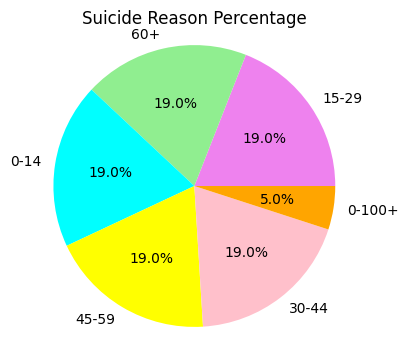

In [24]:
plt.figure(figsize=(4, 4))
plt.pie(suicidebyage, labels=uniqueAgeGroup, autopct='%1.1f%%',  colors=['violet', 'lightgreen','cyan','yellow',"pink","orange"])
plt.title('Suicide Reason Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

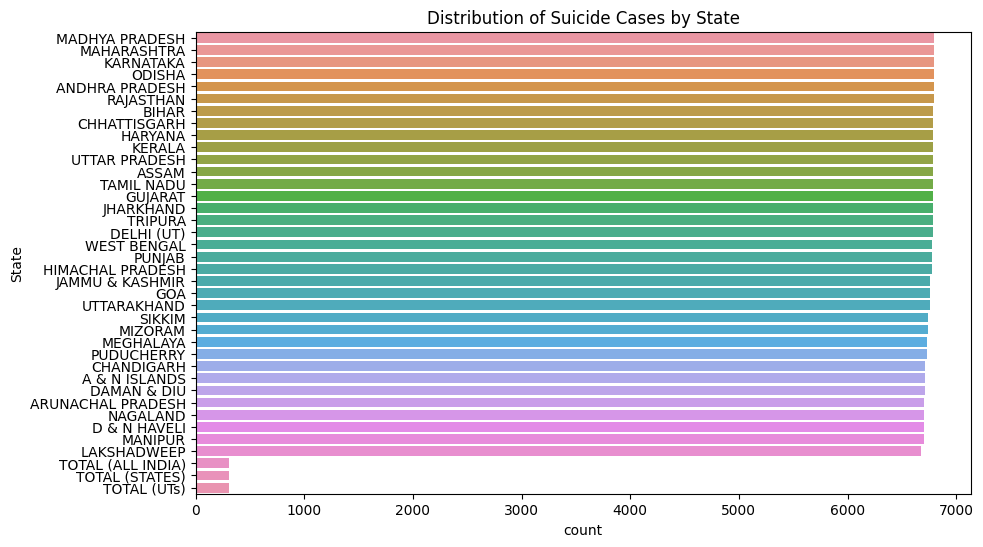

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution of Suicide Cases by State')
plt.show()

In [26]:
states=[unique for unique in df.State.unique()]
states

['A & N ISLANDS',
 'ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHANDIGARH',
 'CHHATTISGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI (UT)',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'LAKSHADWEEP',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUDUCHERRY',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TOTAL (ALL INDIA)',
 'TOTAL (STATES)',
 'TOTAL (UTs)',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL']

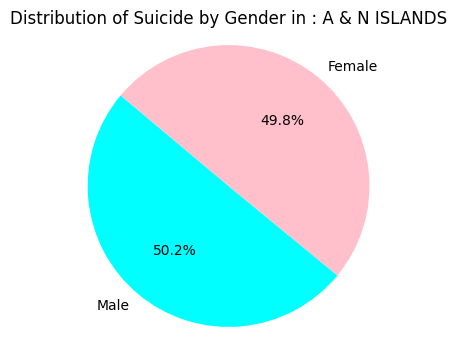

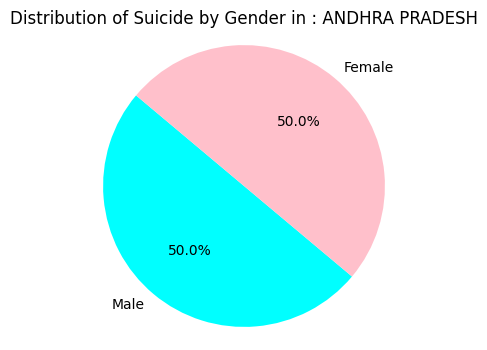

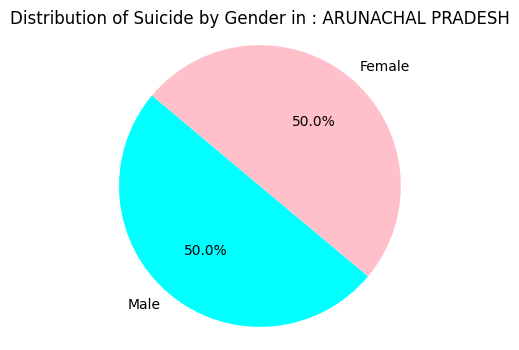

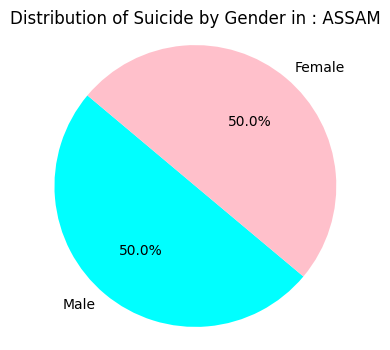

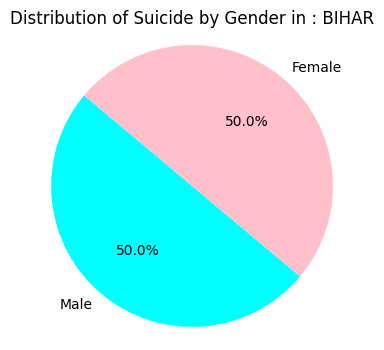

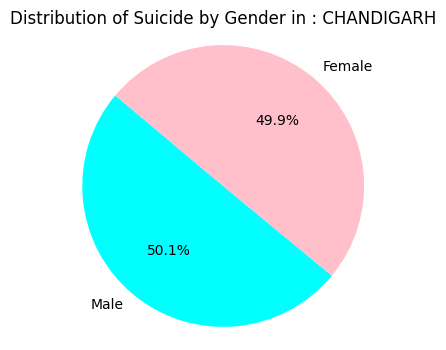

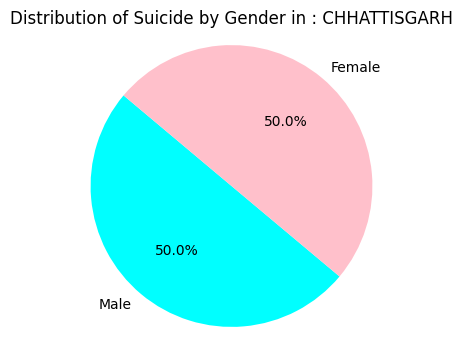

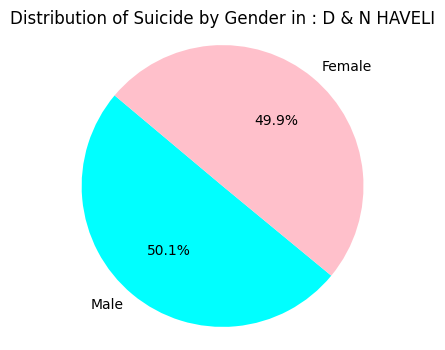

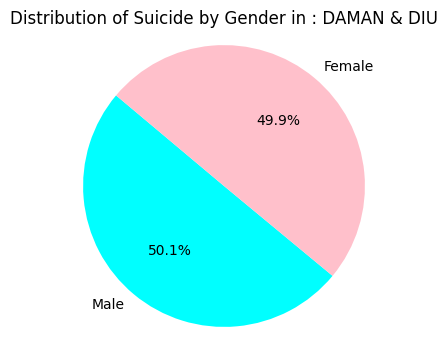

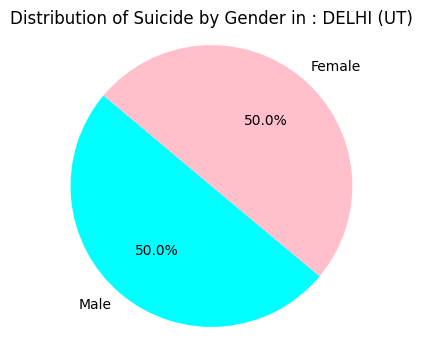

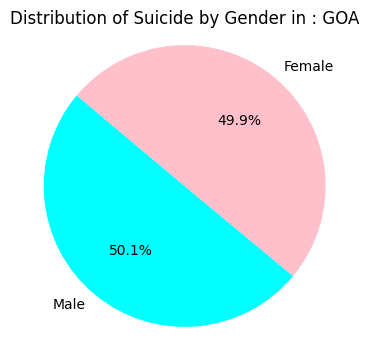

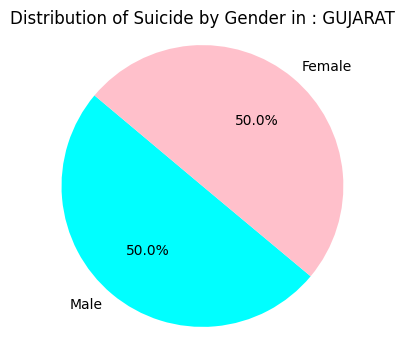

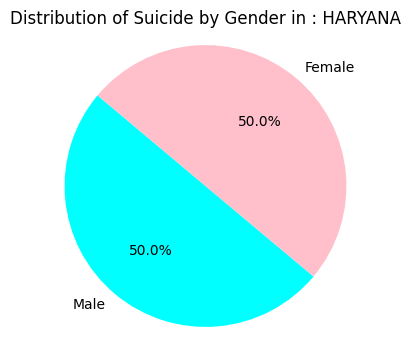

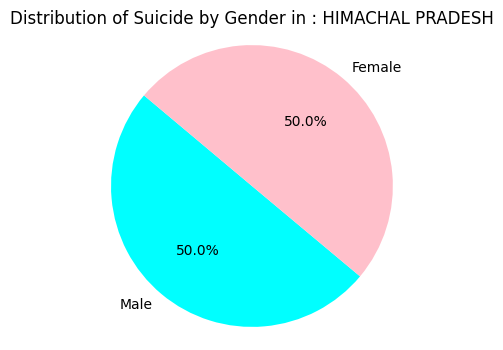

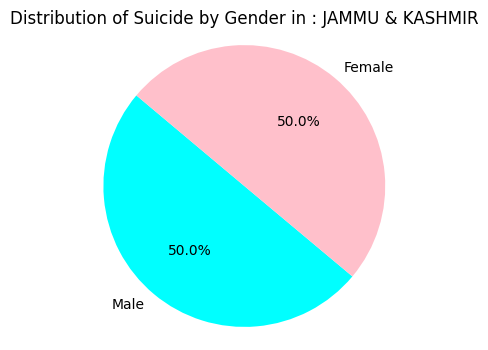

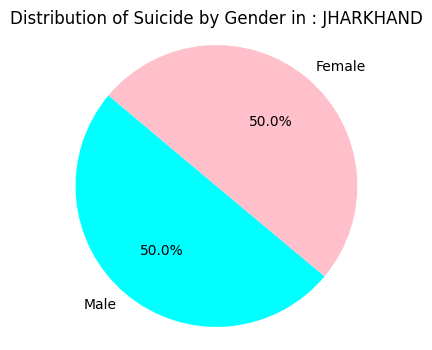

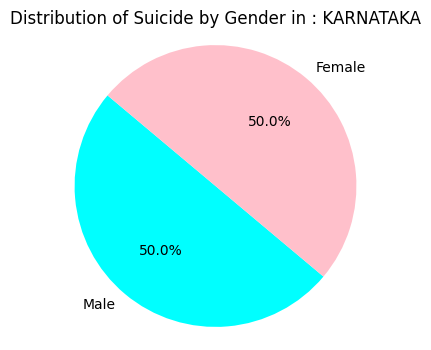

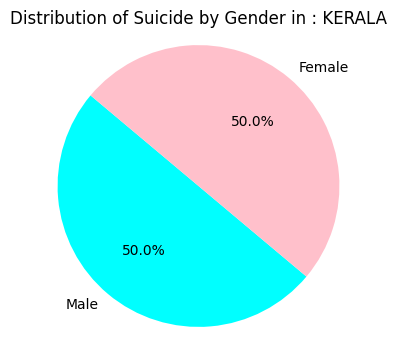

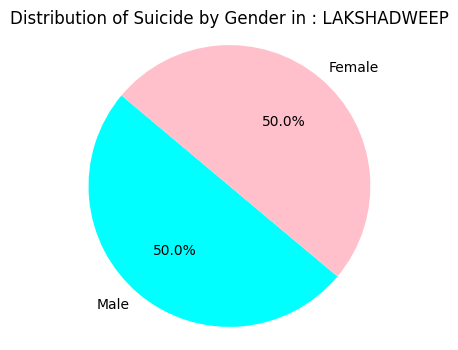

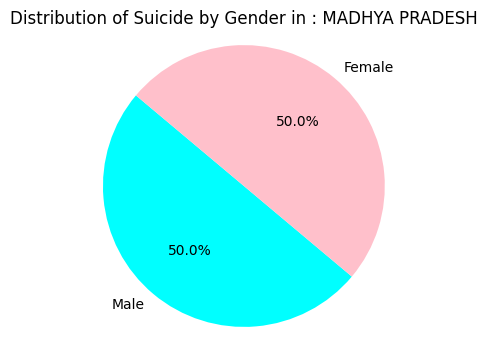

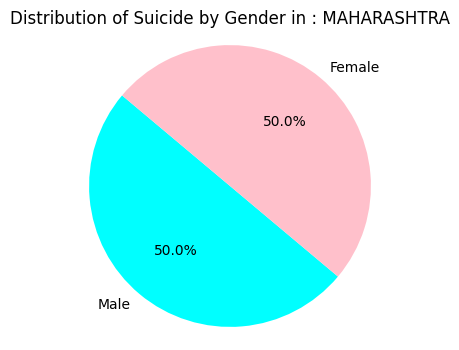

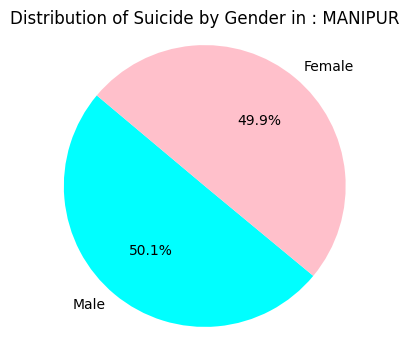

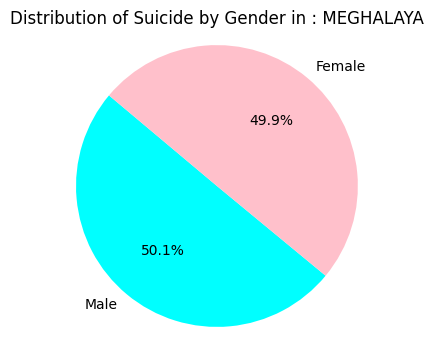

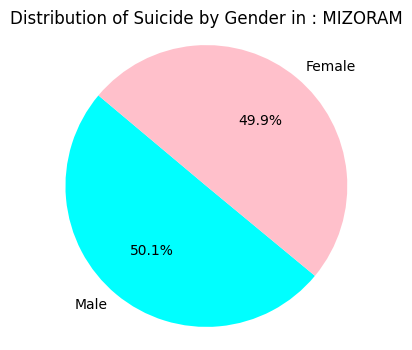

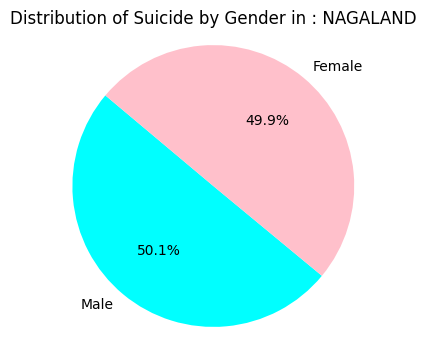

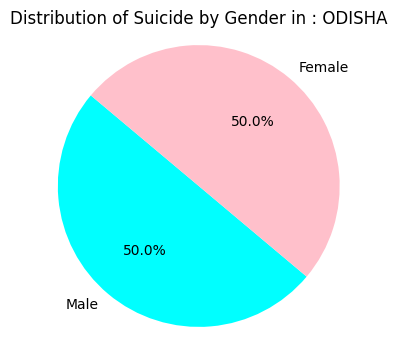

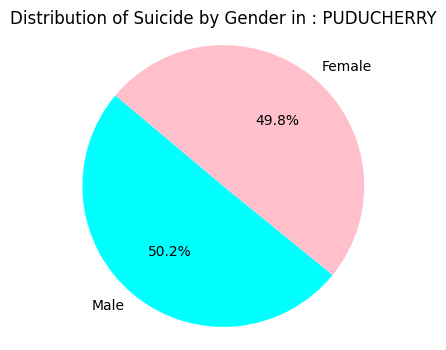

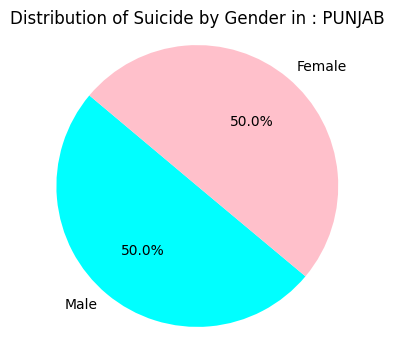

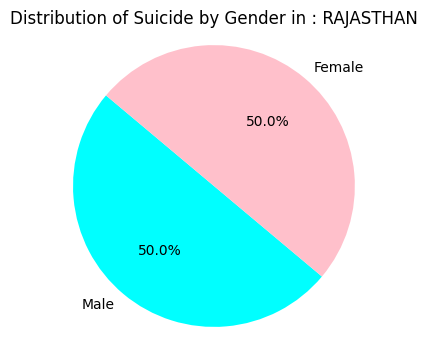

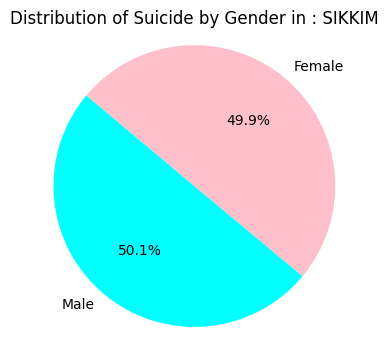

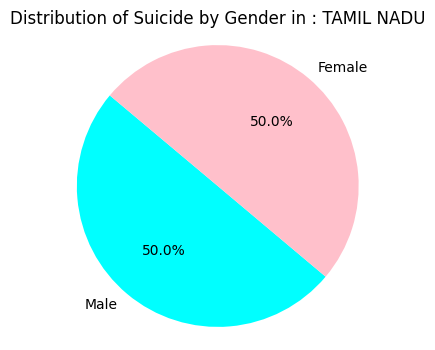

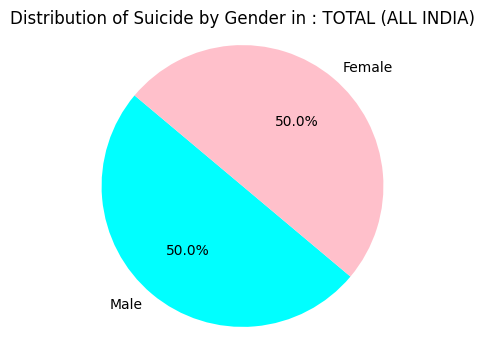

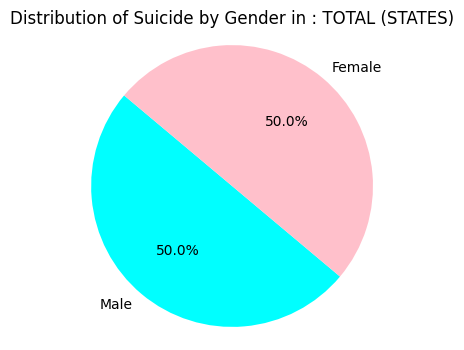

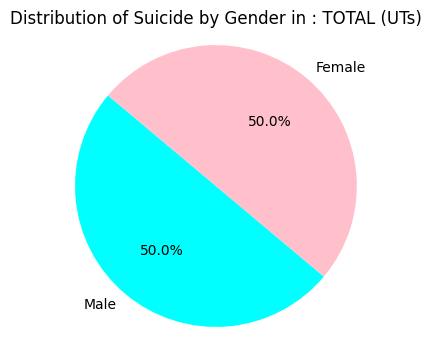

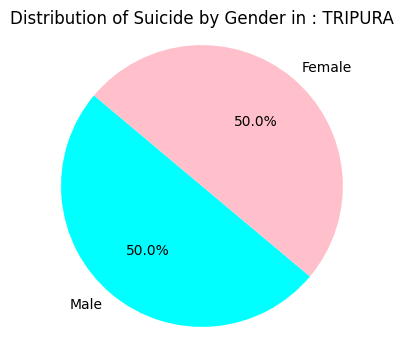

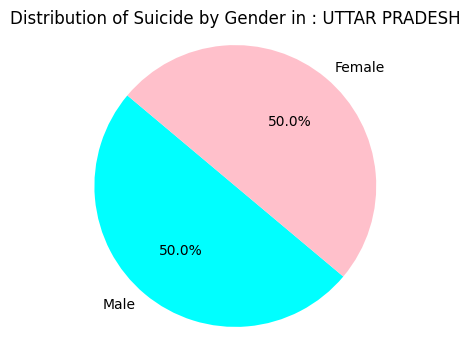

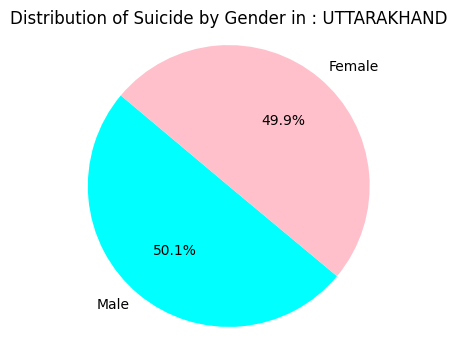

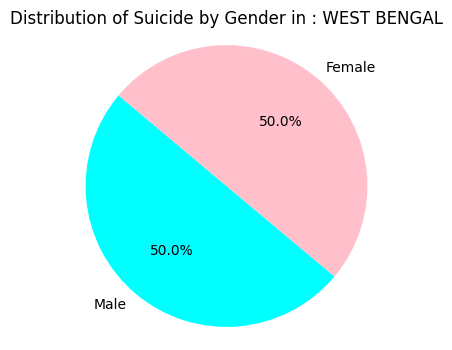

In [27]:
for i in states:
    suicidebyGender=[]
    state=df[df.State==i]
    for j in Gender:
        cases=state[state.Gender==j].shape
        suicidebyGender.append((cases[0]/len(state)*100))
    labels = ['Male', 'Female']
    plt.figure(figsize=(4, 4))
    plt.pie(suicidebyGender, labels=labels, autopct='%1.1f%%', startangle=140, colors=['aqua', 'pink'])
    plt.title(f"Distribution of Suicide by Gender in : {i}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()